Question 1 : For a matrix multiplication between a (n, k) and (k, m) matrix, the product matrix is of size(n,m). To compute this, there will be n rows of the first matrix that is to be computed with m columns of the second matrix each. So total computations will be nm. Also while computing element for the ith row and jth column, there is k multiplications and (k-1) additions. Hence in total there is (mnk) multiplications and (mn*(k-1)) additions.

In [60]:
#question 2
import numpy as np
import time

def matrix_multiply(m1, m2):
    # Check if the matrices are suitable for multiplication
    if len(m1[0]) != len(m2):
        print("Error!")
        return

#initialising result matrix with zeros
    r_matrix = np.zeros((len(m1), len(m2[0])))

    for i in range(len(m1)):
        for j in range(len(m2[0])):
            for k in range(len(m2)):
                r_matrix[i][j] += m1[i][k] * m2[k][j]

    return r_matrix

def matrix_multiplication_np(mat1, mat2):
    return np.dot(mat1, mat2)

# Generating random matrices using NumPy
n, k, m = 10, 20, 35  # Define dimensions
m1 = np.random.rand(n, k)
m2 = np.random.rand(k, m)

# Converting matrices to lists of lists
m1_list = m1.tolist()
m2_list = m2.tolist()

# list to list matrix multiplication time
start_time_list = time.time()
r_matrix = matrix_multiply(m1_list, m2_list)
end_time_list = time.time()
list_duration = end_time_list - start_time_list

# NumPy matrix multiplication function time
start_time_np = time.time()
r_matrix_np = matrix_multiplication_np(m1, m2)
end_time_np = time.time()
np_duration = end_time_np - start_time_np


# print("Matrix 1:")
# print(m1)
# print("\nMatrix 2:")
# print(m2)
# print("\nResult of matrix multiplication:")
# print(r_matrix)
# print("\nResult of matrix multiplication using numpy:")
# print(r_matrix_np)
print(f"Lists matrix multiplication time: {list_duration:.6f} seconds")
print(f"NumPy matrix multiplication time: {np_duration:.6f} seconds")


Lists matrix multiplication time: 0.008011 seconds
NumPy matrix multiplication time: 0.000988 seconds


#question 3 #Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? It will be n*O(n) where n is total elements in array and if we have to find the kth highest element. The Time complexity = k O(n). If n is odd, we need to find the ((n/2)+1)th largest element. If n is even, we has to find the average of (n/2)th element and (n/2+1)th element. So overall O(n^2).

#Better Approach First we can sort the array using quicksort in O(nlogn) time complexity, then we can find the median in constant time based on whether the 'n' is odd or even.

In [64]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

def median(sorted_array):
    n = len(sorted_array)
    if n % 2 == 1:
        return sorted_array[n // 2]
    else:
        mid1 = sorted_array[(n // 2) - 1]
        mid2 = sorted_array[n // 2]
        return (mid1 + mid2) / 2

given_array = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5,5]
sorted_array = quicksort(given_array)

print("Sorted Array:", sorted_array)

length = len(sorted_array)
print("Length of Array:", length)

median = median(sorted_array)
print("Median of Array:", median)

           


Sorted Array: [1, 1, 2, 3, 3, 4, 5, 5, 5, 5, 6, 9]
Length of Array: 12
Median of Array: 4.5


Question 4: Gradient of the following function wrt x and y. $$f(x,y) = x^{2}y + y^{3} \sin(x) Solution: \bigtriangledown f(x,y) = (\delta f / \delta x, \delta f / \delta y) = (2xy + y^{3} \cos(x) , x^{2} + 3y^{2} \sin(x))$$

In [50]:
#question 5
!pip install jax jaxlib         
import jax
import jax.numpy as jnp  

def f(x,y):
    return x**2 * y + y**3 * jnp.sin(x)

# gradient function of f(x,y) at value(1,1)
gradient_f = jax.grad(f, argnums = (0, 0))

# random value
random_x = 1.5
random_y = 1.0

# Evaluate the gradient using JAX
jax_grad = gradient_f(random_x, random_y)

# Analytical gradient   
def analytical_gradient(x, y):
    f_x = 2 * x * y + y**3 * jnp.cos(x)
    f_y = x**2 + 3 * y**2 * jnp.sin(x)
    return f_x,f_y

# Evaluate the analytical gradient
analytical_gradient_result = analytical_gradient(random_x, random_y)


print("\nJAX Gradient:")
print("df/dx =", jax_gradient[0])
print("df/dy =", jax_gradient[1])

print("\nAnalytical Gradient:")
print("df/dx =", analytical_gradient_result[0])
print("df/dy =", analytical_gradient_result[1])


RuntimeError: generator raised StopIteration

In [55]:
#question 6
import sympy as sp

x, y = sp.symbols('x y')

# function f(x, y)
f = x**2 * y + y**3 * sp.sin(x)

# gradient
grad_f_x = sp.diff(f, x)
grad_f_y = sp.diff(f, y)

# 
print("Analytical Gradient:")
print("derivative wrt x =", grad_f_x)
print("deriative wrt y =", grad_f_y)

# results show we received the same gradient


Analytical Gradient:
derivative wrt x = 2*x*y + y**3*cos(x)
deriative wrt y = x**2 + 3*y**2*sin(x)


In [53]:
#question 7
students_data = {
    2022: {
        'Branch 1': {
            'Roll Number': 202201,
            'Name': 'A',
            'Marks': {
                'Maths': 100,
                'English': 70,
                'Science': 85
            }
        },
        'Branch 2': {
            'Roll Number': 202203,
            'Name': 'C',
            'Marks': {
                'Maths': 90,
                'English': 60,
                'Science': 55
            }
        }
    },
    2023: {
        'Branch 1': {
            'Roll Number': 202301,
            'Name': 'D',
            'Marks': {
                'Maths': 100,
                'English': 70,
                'Science': 85
            }
        },
        'Branch 2': {
            'Roll Number': 202302,
            'Name': 'E',
            'Marks': {
                'Maths': 100,
                'English': 70,
                'Science': 85
            }
        }
    },
    2024: {
        'Branch 1': {
            'Roll Number': 202401,
            'Name': 'F',
            'Marks': {
                'Maths': 100,
                'English': 70,
                'Science': 85
            }
        },
        'Branch 2': {
            'Roll Number': 202402,
            'Name': 'G',
            'Marks': {
                'Maths': 100,
                'English': 70,
                'Science': 85
            }
        }
    },
    2025: {
        'Branch 1': {
            'Roll Number': 202501,
            'Name': 'H',
            'Marks': {
                'Maths': 100,
                'English': 70,
                'Science': 85
            }
        },
        'Branch 2': {
            'Roll Number': 202502,
            'Name': 'I',
            'Marks': {
                'Maths': 100,
                'English': 70,
                'Science': 85
            }
        }
    }
}

roll_number = students_data[2022]['Branch 1']['Roll Number']
name = students_data[2022]['Branch 1']['Name']
english_marks = students_data[2022]['Branch 1']['Marks']['English']

# Displaying data for the example student
print(f"Name: {name}, English Marks: {english_marks}")


Name: A, English Marks: 70


In [54]:
#question 8
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks


class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students


class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches


# Students
student1 = Student(202201, 'A', {'Maths': 100, 'English': 70, 'Science': 85})
student2 = Student(202202, 'B', {'Maths': 90, 'English': 60, 'Science': 55})
student3 = Student(202301, 'C', {'Maths': 70, 'English': 80, 'Science': 95})
student4 = Student(202302, 'D', {'Maths': 86, 'English': 40, 'Science': 85})
student5 = Student(202401, 'E', {'Maths': 10, 'English': 50, 'Science': 75})
student6 = Student(202402, 'F', {'Maths': 50, 'English': 20, 'Science': 35})
student7 = Student(202501, 'G', {'Maths': 94, 'English': 90, 'Science': 45})
student8 = Student(202502, 'H', {'Maths': 72, 'English': 40, 'Science': 65})

#Branches
branch1 = Branch('Branch 1', [student1, student3, student5, student7])
branch2 = Branch('Branch 2', [student2, student4, student6, student8])

# Years
year_2022 = Year(2022, [branch1, branch2])
year_2023 = Year(2023, [branch1, branch2])
year_2024 = Year(2024, [branch1, branch2])
year_2025 = Year(2025, [branch1, branch2])

# database
database = [year_2022, year_2023, year_2024, year_2025]

stud = database[0].branches[0].students[0]
print(f"Name: {stud.name}, English Marks: {stud.marks['English']}")


Name: A, English Marks: 70


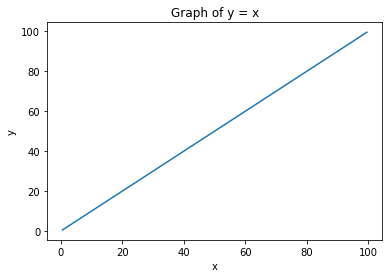

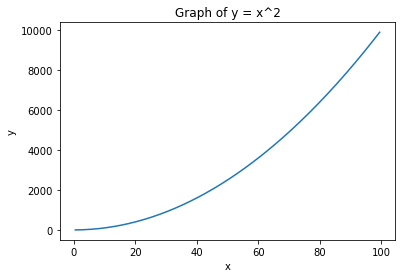

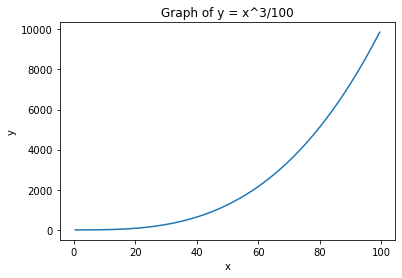

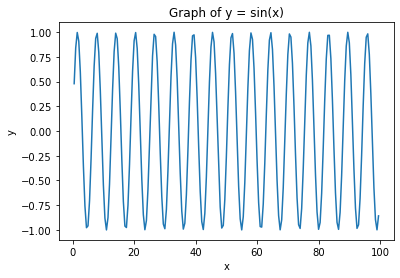

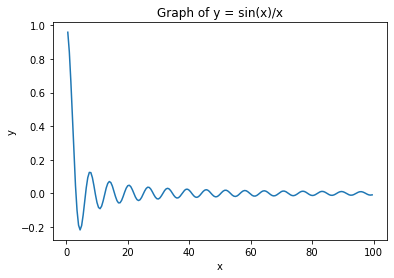

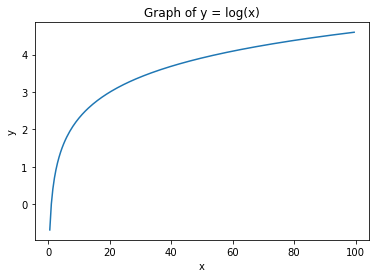

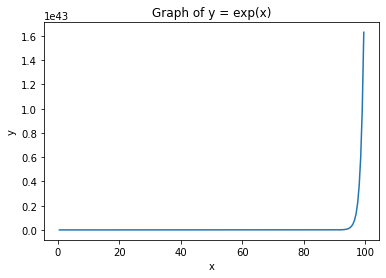

In [43]:
#question 9
import matplotlib.pyplot as plt
import numpy as np
import math

# generate values in range of 0.5 to 100.0 in steps of 0.5
x1 = np.arange(0.5, 100.0, 0.5)

#generated function
y1 = x1
y2 = x1**2
y3 = (x1**3)/100
y4 = np.sin(x1)
y5 = np.sin(x1)/x1
y6 = np.log(x1)
y7 = np.exp(x1)

# Plot 1
plt.plot(x1, y1, label='y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y = x')
plt.show()

#PLot 2
plt.plot(x1, y2, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y = x^2')
plt.show()

#Plot 3
plt.plot(x1, y3, label='y = x^3/100')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y = x^3/100')
plt.show()

#plot 4
plt.plot(x1, y4, label='y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y = sin(x)')
plt.show()

#plot 5
plt.plot(x1, y5, label='y = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y = sin(x)/x')
plt.show()

#plot 6
plt.plot(x1, y6, label='y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y = log(x)')
plt.show()

#plot 7
plt.plot(x1, y7, label='y = exp(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y = exp(x)')
plt.show()





In [46]:
#question 10
import numpy as np
import pandas as pd

# random 20X5 matrix
random_matrix = np.random.uniform(1, 2, size=(20, 5))

# Create a DataFrame with the matrix
df = pd.DataFrame(random_matrix, columns=['a', 'b', 'c', 'd', 'e'])

# highest standard deviation column
max_std = df.std().idxmax()

# row with lowest mean
low_mean = df.mean(axis=1).idxmin()

print("DataFrame")
print(df)


print("\nHighest standard deviation column:", max_std)
print("Lowest mean row:", low_mean)

# question 11

# adding column f
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Adding column g
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Finding number of rows
num_lt8 = df[df['g'] == 'LT8'].shape[0]

# Find the standard deviation 
std_dev_lt8 = df[df['g'] == 'LT8']['f'].std()
std_dev_gt8 = df[df['g'] == 'GT8']['f'].std()

print("New dataframe:")
print(df)


print("\nNumber of rows where the value in column 'g' is 'LT8':", num_lt8)
print("Standard deviation of column 'f' for 'LT8':", std_dev_lt8)
print("Standard deviation of column 'f' for 'GT8':", std_dev_gt8)



DataFrame
           a         b         c         d         e
0   1.906458  1.907079  1.758793  1.966471  1.179266
1   1.777128  1.013867  1.163138  1.935162  1.938257
2   1.667986  1.121383  1.999905  1.083168  1.421790
3   1.848872  1.644648  1.020578  1.252182  1.761830
4   1.978376  1.813084  1.828553  1.922152  1.684623
5   1.792943  1.569246  1.343386  1.809640  1.784931
6   1.151187  1.827711  1.405075  1.796283  1.279827
7   1.139755  1.287393  1.037698  1.186772  1.897333
8   1.114520  1.874988  1.080320  1.906880  1.183277
9   1.715051  1.119427  1.198613  1.273012  1.247873
10  1.450004  1.487378  1.329781  1.997829  1.862086
11  1.225292  1.865202  1.017509  1.140076  1.779957
12  1.957453  1.025819  1.623986  1.739148  1.523293
13  1.273754  1.256674  1.099822  1.286338  1.058778
14  1.679438  1.374746  1.273738  1.082291  1.980059
15  1.232910  1.391862  1.256075  1.954807  1.898333
16  1.754377  1.414525  1.473383  1.804196  1.179435
17  1.007439  1.031016  1.991780  1.

In [48]:
#question 12
#Broadcasting in numpy ensures that arrays with different sizes while doing arithmetic operations, don't get compatibility issues.
#For example
import numpy as np

#arrays
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Broadcasting multiplication
scalar_multiplier = 2
result1 = a * scalar_multiplier
#Here we will se that scalar multiplier '2' is stretched to the size of array 'a' to get muliplied by each element and give the product of the final size.

# Broadcasting with a 2D array

c = np.array([[ 1,  1,  1],
              [10, 20, 30],
              [10, 20, 30],
              [10, 20, 30]])
d = np.array([90, 80, 70])

result2 = c + d
#Here array d is stretched to be a 2d array of size of array c to facilitate vector addition.

print("Array a:", a)
print("Array b:", b)
print("a*b \n")
print("Scalar multiplier:", scalar_multiplier)
print("Broadcasting multiplication result:", result1)

print("\n Array c:", c)
print("\n Array d:", d)
print("c + d \n")
print("Broadcasting addition result:", result2)



Array a: [1 2 3]
Array b: [4 5 6]
a*b 

Scalar multiplier: 2
Broadcasting multiplication result: [2 4 6]

 Array c: [[ 1  1  1]
 [10 20 30]
 [10 20 30]
 [10 20 30]]

 Array d: [90 80 70]
c + d 

Broadcasting addition result: [[ 91  81  71]
 [100 100 100]
 [100 100 100]
 [100 100 100]]


In [52]:
#question 13
import numpy as np

def compute_argmin(arr):
    indexmin = 0
    min_value = arr[0]

    for i in range(1, arr.size):
        if arr[i] < min_value:
            min_value = arr[i]
            indexmin = i

    return indexmin

arr = np.array([4, 2, 7, 1, 9, 3])
result = compute_argmin(arr)
print("Argmin:", result)

# Verification
numpy_argmin = np.argmin(arr)
print("NumPy argmin:", numpy_argmin)


Argmin: 3
NumPy argmin: 3
